<a href="https://colab.research.google.com/github/arraiyopensource/kornia-examples/blob/master/color_conversions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Color space conversion

In this tutorial we are going to learn how to convert image from different image spaces using `kornia.color`.

## Explanation

Images are asumed to be loaded either in RGB or Grayscale space.

1.   We will use OpenCV to load images.
2.   Convert from BGR to RGB (note that OpenCV loads images in BGR format).



In [73]:
#@title
from google.colab import drive
drive.mount('/content/drive');

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


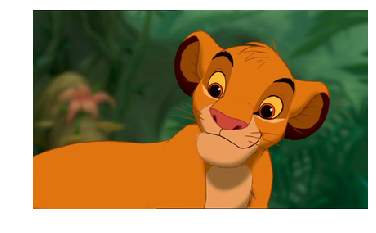

In [63]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

# load using opencv and convert to 
img_bgr: np.array = cv2.imread('simba.png', cv2.IMREAD_COLOR)
img_rgb: np.array = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb); plt.axis('off');

Alternatively we can use use `kornia.color` to perform the color transformation.

1.   Convert the `np.array` to `torch.Tensor`
2.   Convert the tensor to RGB
3.   Convert back the tensor to numpy for visualisation.

In [64]:
!pip install kornia;
import torch
import kornia
import torchvision

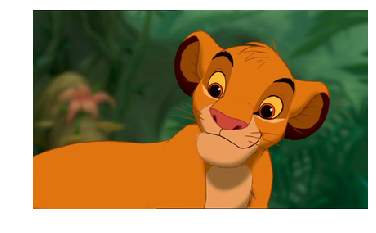

In [65]:
# convert the numpy array to torch
x_bgr: torch.Tensor = kornia.image_to_tensor(img_bgr)

# to BGR
x_rgb: torch.Tensor = kornia.bgr_to_rgb(x_bgr)

# convert back to numpy and visualize
img_np: np.array = kornia.tensor_to_image(x_rgb)
plt.imshow(img_np); plt.axis('off');

Using `kornia` we easily perform color transformation in batch mode.

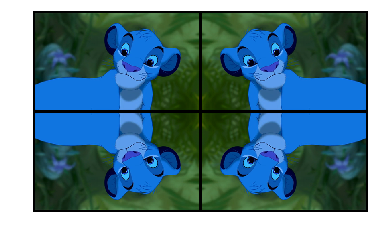

In [66]:
def hflip(input: torch.Tensor) -> torch.Tensor:
  return torch.flip(input, [-1])

def vflip(input: torch.Tensor) -> torch.Tensor:
  return torch.flip(input, [-2])

def rot180(input: torch.Tensor) -> torch.Tensor:
  return torch.flip(input, [-2, -1])

def imshow(input: torch.Tensor):
    out: torch.Tensor = torchvision.utils.make_grid(input, nrow=2, padding=5)
    out_np: np.array = kornia.tensor_to_image(out)
    plt.imshow(out_np); plt.axis('off');

# create a batch of images
xb_bgr = torch.cat([x_bgr, hflip(x_bgr), vflip(x_bgr), rot180(x_bgr)])
imshow(xb_bgr)

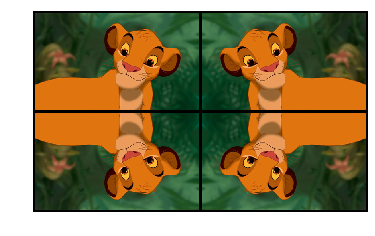

In [67]:
# convert to back to RGB
xb_rgb = kornia.bgr_to_rgb(xb_bgr)
imshow(xb_rgb)


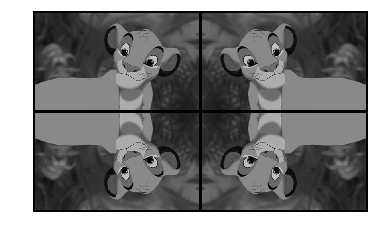

In [68]:
# convert to grayscale
# NOTE: image comes in torch.uint8, and kornia assumes floating point type
xb_gray = kornia.rgb_to_grayscale(xb_rgb.float() / 255.)
imshow(xb_gray)

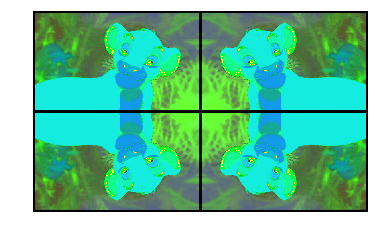

In [71]:
# convert to HSV
xb_hsv = kornia.rgb_to_hsv(xb_rgb.float() / 255.)
imshow(xb_hsv)